In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
df = pd.read_csv('market price karnataka data.csv')
df.head()

,datetime,state,district_name,market_name,commodity_name,variety,tempmax,tempmin,temp,dew,humidity,precip,windspeed,solarradiation,uvindex,min_price,max_price,modal_price
0,01-01-2014,Karnataka,Bangalore,Binny Mill (F&V),Banana - Green,Banana - Green,29.0,16.4,22.3,17.0,74.7,0.0,22.3,253.1,9,NaN,NaN,NaN
1,02-01-2014,Karnataka,Bangalore,Binny Mill (F&V),Banana - Green,Banana - Green,29.0,16.3,22.2,16.1,71.8,0.0,15.8,255.9,9,NaN,NaN,NaN
2,03-01-2014,Karnataka,Bangalore,Binny Mill (F&V),Banana - Green,Banana - Green,30.0,15.7,22.4,16.7,72.5,0.0,17.3,211.3,8,700.0,1100.0,900.0
3,04-01-2014,Karnataka,Bangalore,Binny Mill (F&V),Banana - Green,Banana - Green,32.0,15.6,23.0,12.2,57.3,0.0,18.4,236.2,8,700.0,1100.0,900.0
4,05-01-2014,Karnataka,Bangalore,Binny Mill (F&V),Banana - Green,Banana - Green,32.0,15.6,23.0,14.1,63.6,0.0,16.6,254.0,9,NaN,NaN,NaN


In [12]:
df.columns

Index(['datetime', 'state', 'district_name', 'market_name', 'commodity_name',
       'variety', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip',
       'windspeed', 'solarradiation', 'uvindex', 'min_price', 'max_price',
       'modal_price'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        4018 non-null   object 
 1   state           4018 non-null   object 
 2   district_name   4018 non-null   object 
 3   market_name     4018 non-null   object 
 4   commodity_name  4018 non-null   object 
 5   variety         4018 non-null   object 
 6   tempmax         4018 non-null   float64
 7   tempmin         4018 non-null   float64
 8   temp            4018 non-null   float64
 9   dew             4018 non-null   float64
 10  humidity        4018 non-null   float64
 11  precip          4018 non-null   float64
 12  windspeed       4018 non-null   float64
 13  solarradiation  4018 non-null   float64
 14  uvindex         4018 non-null   int64  
 15  min_price       352 non-null    float64
 16  max_price       352 non-null    float64
 17  modal_price     352 non-null    f

In [14]:
df.shape

(4018, 18)

In [15]:
df.notnull().sum()

,0
datetime,4018
state,4018
district_name,4018
market_name,4018
commodity_name,4018
variety,4018
tempmax,4018
tempmin,4018
temp,4018
dew,4018


In [16]:
df.isnull().sum()

,0
datetime,0
state,0
district_name,0
market_name,0
commodity_name,0
variety,0
tempmax,0
tempmin,0
temp,0
dew,0


In [17]:
from sklearn.impute import KNNImputer

num_cols = df.select_dtypes(include='number')
imputer = KNNImputer(n_neighbors=5)

df[num_cols.columns] = imputer.fit_transform(num_cols)

df.isnull().sum()

,0
datetime,0
state,0
district_name,0
market_name,0
commodity_name,0
variety,0
tempmax,0
tempmin,0
temp,0
dew,0


In [18]:
# Convert 'Price Date' to datetime format
df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%Y')

# Extract day, month, year
df['Day'] = df['datetime'].dt.day
df['Month'] = df['datetime'].dt.month
df['Year'] = df['datetime'].dt.year

# Extract weekday (0=Monday, 6=Sunday)
df['Weekday'] = df['datetime'].dt.day_name()

# Filter only weekends
weekend_df = df[df['Weekday'].isin(['Saturday', 'Sunday'])]

df.head()

,datetime,state,district_name,market_name,commodity_name,variety,tempmax,tempmin,temp,dew,...,windspeed,solarradiation,uvindex,min_price,max_price,modal_price,Day,Month,Year,Weekday
0,2014-01-01,Karnataka,Bangalore,Binny Mill (F&V),Banana - Green,Banana - Green,29.0,16.4,22.3,17.0,...,22.3,253.1,9.0,1020.0,1220.0,1120.0,1,1,2014,Wednesday
1,2014-01-02,Karnataka,Bangalore,Binny Mill (F&V),Banana - Green,Banana - Green,29.0,16.3,22.2,16.1,...,15.8,255.9,9.0,840.0,1240.0,1060.0,2,1,2014,Thursday
2,2014-01-03,Karnataka,Bangalore,Binny Mill (F&V),Banana - Green,Banana - Green,30.0,15.7,22.4,16.7,...,17.3,211.3,8.0,700.0,1100.0,900.0,3,1,2014,Friday
3,2014-01-04,Karnataka,Bangalore,Binny Mill (F&V),Banana - Green,Banana - Green,32.0,15.6,23.0,12.2,...,18.4,236.2,8.0,700.0,1100.0,900.0,4,1,2014,Saturday
4,2014-01-05,Karnataka,Bangalore,Binny Mill (F&V),Banana - Green,Banana - Green,32.0,15.6,23.0,14.1,...,16.6,254.0,9.0,740.0,1040.0,880.0,5,1,2014,Sunday


In [19]:
cols_to_move = ['min_price', 'max_price','modal_price']
other_cols = [col for col in df.columns if col not in ['datetime'] + cols_to_move]

# Create the new order of columns
new_column_order = other_cols + cols_to_move

# Reindex the DataFrame with the new column order
df = df[new_column_order]

df.head()

,state,district_name,market_name,commodity_name,variety,tempmax,tempmin,temp,dew,humidity,...,windspeed,solarradiation,uvindex,Day,Month,Year,Weekday,min_price,max_price,modal_price
0,Karnataka,Bangalore,Binny Mill (F&V),Banana - Green,Banana - Green,29.0,16.4,22.3,17.0,74.7,...,22.3,253.1,9.0,1,1,2014,Wednesday,1020.0,1220.0,1120.0
1,Karnataka,Bangalore,Binny Mill (F&V),Banana - Green,Banana - Green,29.0,16.3,22.2,16.1,71.8,...,15.8,255.9,9.0,2,1,2014,Thursday,840.0,1240.0,1060.0
2,Karnataka,Bangalore,Binny Mill (F&V),Banana - Green,Banana - Green,30.0,15.7,22.4,16.7,72.5,...,17.3,211.3,8.0,3,1,2014,Friday,700.0,1100.0,900.0
3,Karnataka,Bangalore,Binny Mill (F&V),Banana - Green,Banana - Green,32.0,15.6,23.0,12.2,57.3,...,18.4,236.2,8.0,4,1,2014,Saturday,700.0,1100.0,900.0
4,Karnataka,Bangalore,Binny Mill (F&V),Banana - Green,Banana - Green,32.0,15.6,23.0,14.1,63.6,...,16.6,254.0,9.0,5,1,2014,Sunday,740.0,1040.0,880.0


In [20]:
print("Unique values for 'District Name':", df['state'].unique())
print("Unique values for 'District Name':", df['district_name'].unique())
print("Unique values for 'Market Name':", df['market_name'].unique())
print("Unique values for 'Commodity':", df['commodity_name'].unique())
print("Unique values for 'Year':", df['Year'].unique())

Unique values for 'District Name': ['Karnataka']
Unique values for 'District Name': ['Bangalore' 'Chamrajnagar']
Unique values for 'Market Name': ['Binny Mill (F&V)' 'Chamaraj Nagar']
Unique values for 'Commodity': ['Banana - Green']
Unique values for 'Year': [2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]


In [21]:
df.describe()

,tempmax,tempmin,temp,dew,humidity,precip,windspeed,solarradiation,uvindex,Day,Month,Year,min_price,max_price,modal_price
count,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000
mean,30.488178,19.462668,24.521205,18.059034,70.959258,2.705686,19.199104,221.022424,7.901692,15.730463,6.522648,2019.000747,950.107765,1251.317422,1106.061971
std,2.856101,2.316031,2.013138,3.304606,12.461195,5.757069,8.036316,56.465649,1.738733,8.801536,3.449210,3.162868,130.223265,183.380001,150.431597
min,21.800000,11.300000,19.100000,3.600000,30.400000,0.000000,4.300000,0.000000,0.000000,1.000000,1.000000,2014.000000,500.000000,600.000000,500.000000
25%,28.500000,18.000000,23.200000,16.400000,62.900000,0.000000,13.000000,185.000000,7.000000,8.000000,4.000000,2016.000000,850.000000,1140.000000,1000.000000
50%,30.000000,19.900000,24.200000,19.300000,74.500000,0.300000,18.400000,227.700000,8.000000,16.000000,7.000000,2019.000000,930.000000,1220.000000,1080.000000
75%,32.000000,21.000000,25.700000,20.300000,80.100000,2.900000,24.100000,261.875000,9.000000,23.000000,10.000000,2022.000000,1016.000000,1320.000000,1160.000000
max,39.000000,26.400000,32.400000,24.400000,98.600000,92.830000,118.400000,349.500000,10.000000,31.000000,12.000000,2024.000000,2000.000000,2500.000000,2300.000000


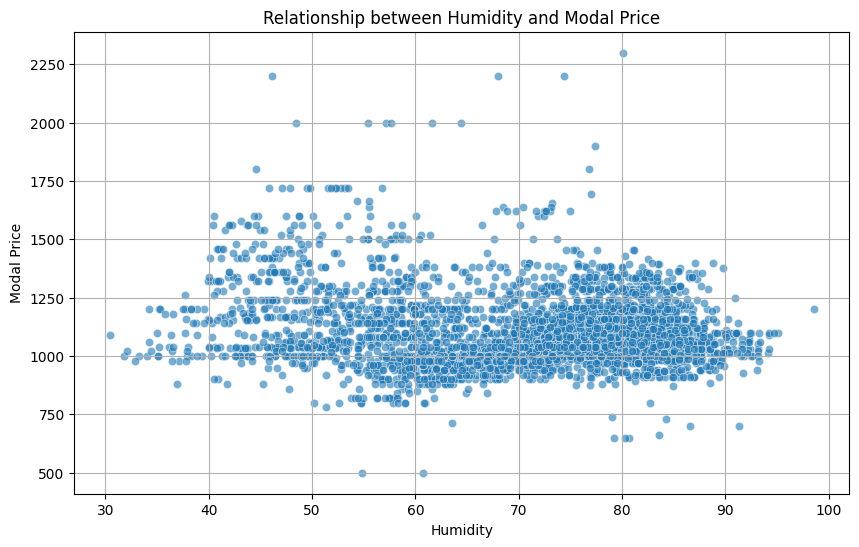

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='humidity', y='modal_price', alpha=0.6)
plt.title('Relationship between Humidity and Modal Price')
plt.xlabel('Humidity')
plt.ylabel('Modal Price')
plt.grid(True)
plt.show()

In [23]:
correlation = df['humidity'].corr(df['modal_price'])
print(f"Pearson correlation between Humidity and Modal Price: {correlation:.3f}")

Pearson correlation between Humidity and Modal Price: -0.144


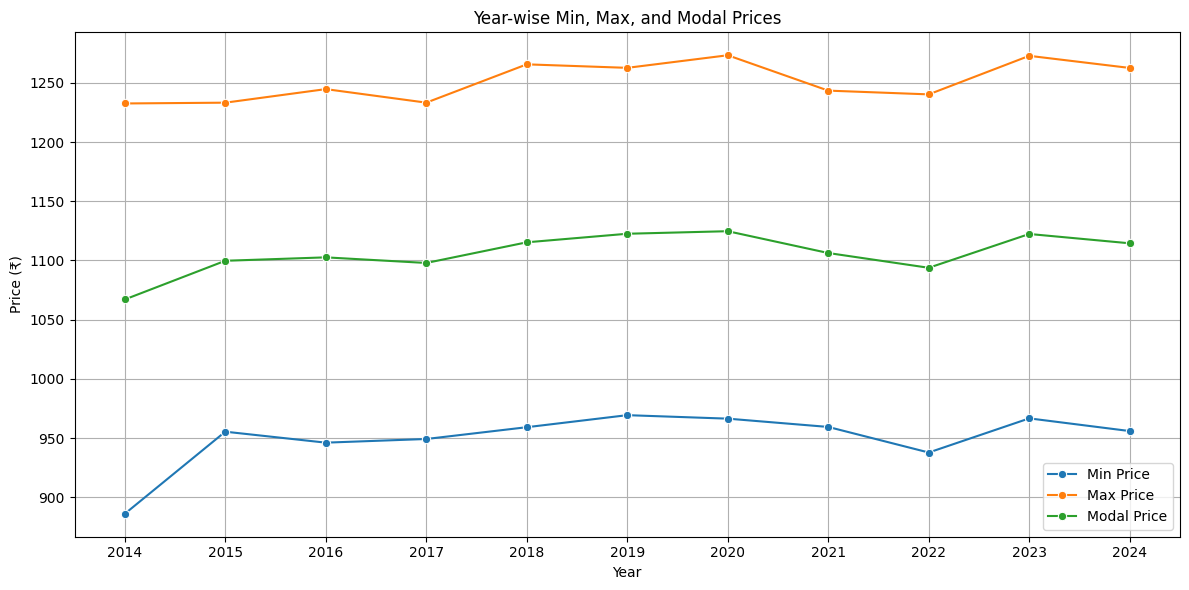

In [24]:
# Group by Year and calculate average prices
yearly_prices = (
    df.groupby('Year')[['min_price', 'max_price', 'modal_price']]
    .mean()
    .reset_index()
)

# Plot the chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_prices, x='Year', y='min_price', marker='o', label='Min Price')
sns.lineplot(data=yearly_prices, x='Year', y='max_price', marker='o', label='Max Price')
sns.lineplot(data=yearly_prices, x='Year', y='modal_price', marker='o', label='Modal Price')

plt.title('Year-wise Min, Max, and Modal Prices')
plt.xlabel('Year')
plt.ylabel('Price (₹)')
plt.grid(True)
plt.xticks(yearly_prices['Year'].unique())
plt.legend()
plt.tight_layout()
plt.show()


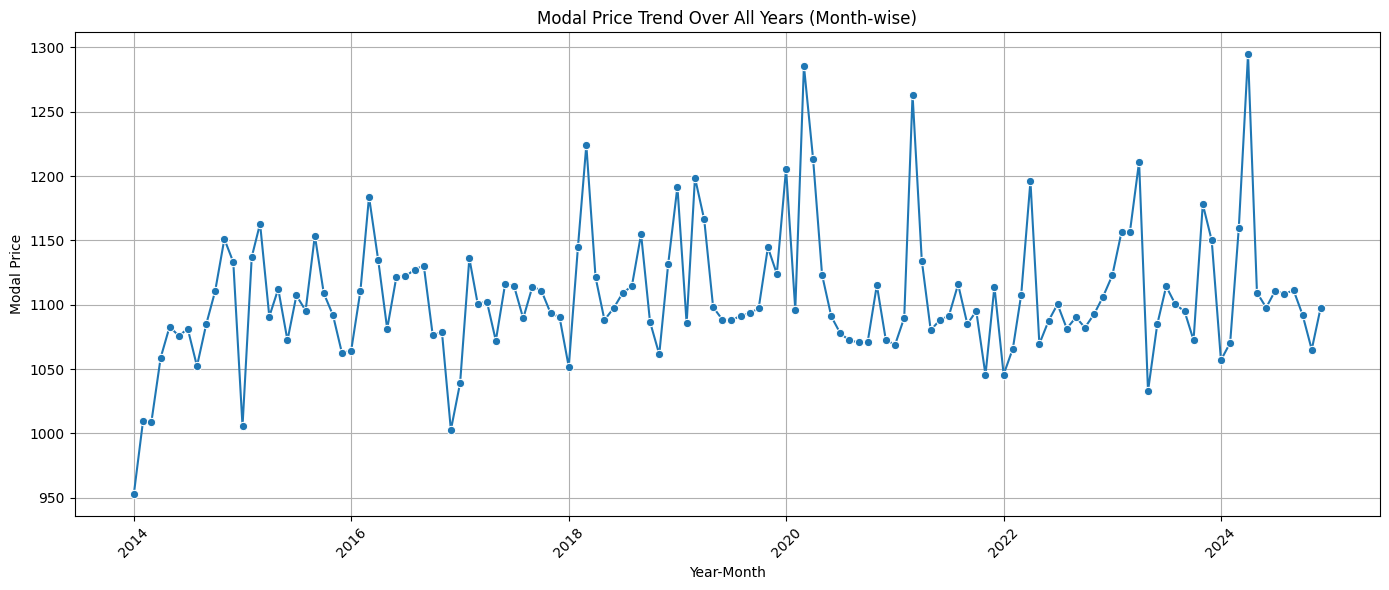

In [25]:
# Group by both Year and Month
modal_trend = (
    df.groupby(['Year', 'Month'])['modal_price']
    .mean()
    .reset_index()
)

# Create a single time axis by combining Year + Month
modal_trend['Year_Month'] = pd.to_datetime(modal_trend['Year'].astype(str) + '-' + modal_trend['Month'].astype(str) + '-01')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=modal_trend, x='Year_Month', y='modal_price', marker='o')

plt.title('Modal Price Trend Over All Years (Month-wise)')
plt.xlabel('Year-Month')
plt.ylabel('Modal Price')
plt.grid(True)

# Show year ticks every 6 months for readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

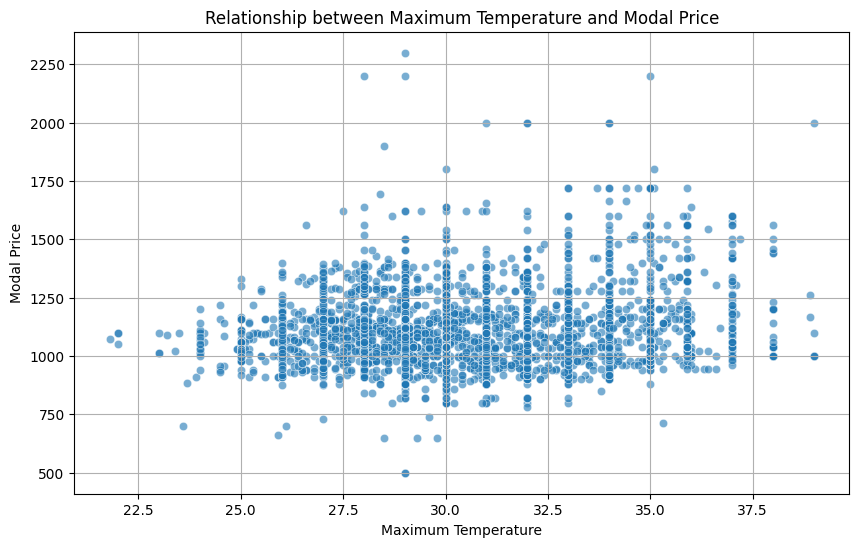

Pearson correlation between Maximum Temperature and Modal Price: 0.131


In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tempmax', y='modal_price', alpha=0.6)
plt.title('Relationship between Maximum Temperature and Modal Price')
plt.xlabel('Maximum Temperature')
plt.ylabel('Modal Price')
plt.grid(True)
plt.show()

correlation_tempmax = df['tempmax'].corr(df['modal_price'])
print(f"Pearson correlation between Maximum Temperature and Modal Price: {correlation_tempmax:.3f}")

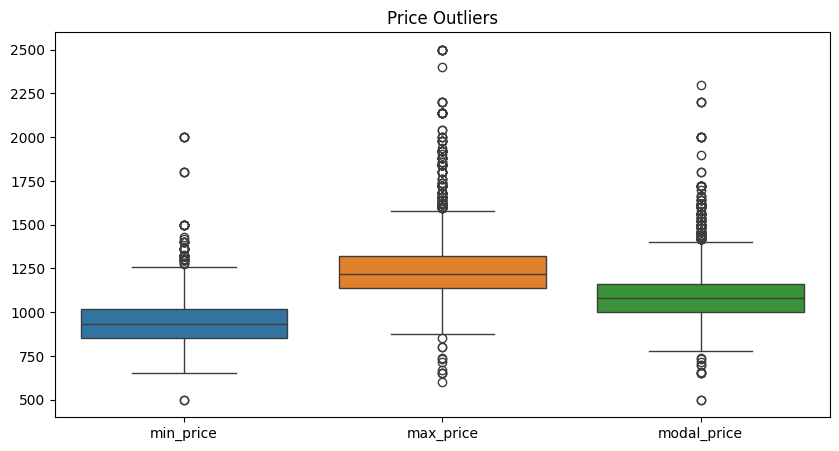

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['min_price','max_price','modal_price']])
plt.title("Price Outliers")
plt.show()


In [28]:
price_cols = ['min_price', 'max_price', 'modal_price']

Q1 = df[price_cols].quantile(0.25)
Q3 = df[price_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[~(
    (df[price_cols] < lower_bound) |
    (df[price_cols] > upper_bound)
).any(axis=1)]

print("Original rows:", len(df))
print("Cleaned rows:", len(df_clean))
print("Removed outliers:", len(df) - len(df_clean))


Original rows: 4018
Cleaned rows: 3795
Removed outliers: 223


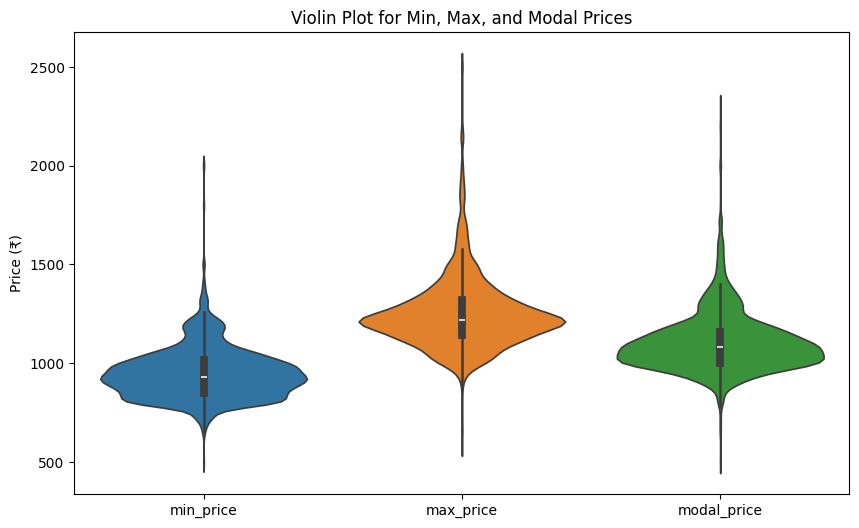

In [29]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['min_price', 'max_price', 'modal_price']])
plt.title("Violin Plot for Min, Max, and Modal Prices")
plt.ylabel("Price (₹)")
plt.show()


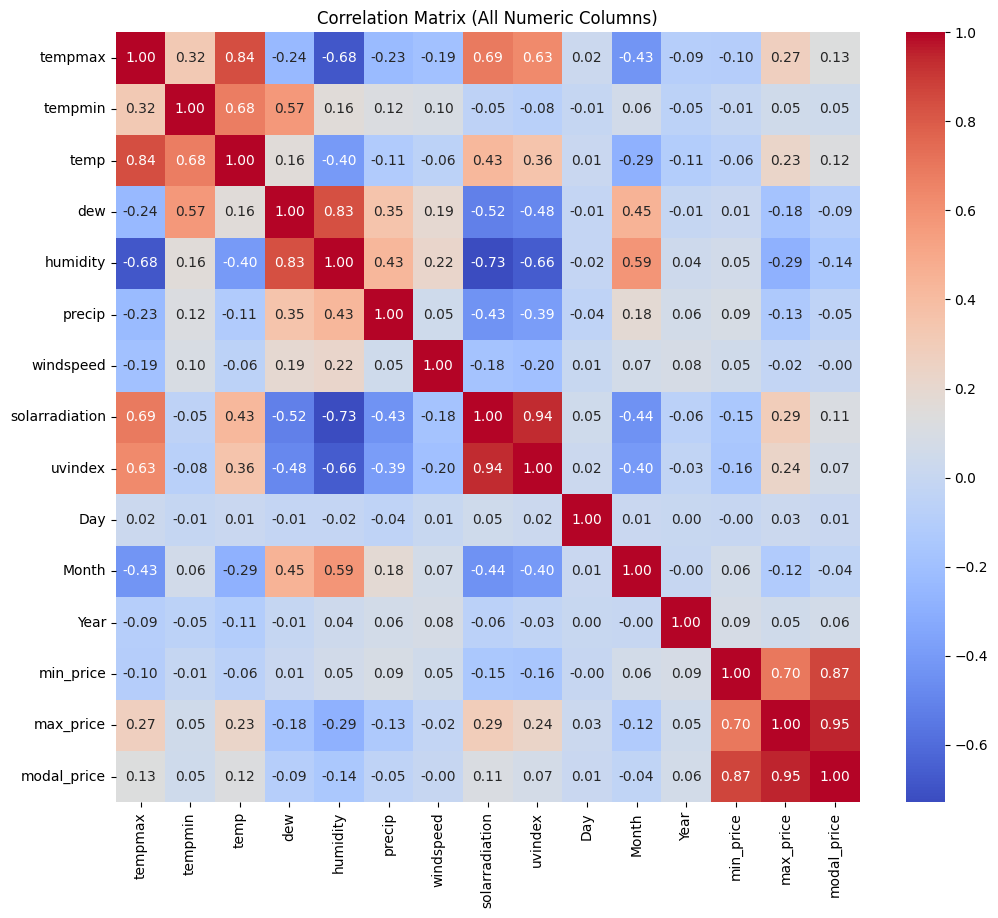

In [30]:
# Automatically select all numeric columns
numeric_cols = df.select_dtypes(include='number').columns
corr_matrix_all = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_all, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (All Numeric Columns)")
plt.show()


**Price Relationships**

min_price, max_price, and modal_price are very strongly positively correlated (close to 1).
✅ This is expected since modal price is usually within min–max range.

**Temporal Features**

Year, Month, Day, Week_of_year, etc., may show weak correlations with prices unless there is seasonal trend.
⚠ If correlation is near 0, these features do not linearly explain price variation.

**Other Numeric Features**

Variables like temp, humidity, precip, soil_moisture, etc., may have weak to moderate correlation with prices.

Strong correlations (>|0.7|) highlight features that most affect price changes.

In [31]:
# Select numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate skewness
skewness = df[numeric_cols].skew()

# Print results
print("Skewness of numerical columns:")
print(skewness)


Skewness of numerical columns:
tempmax           0.335573
tempmin          -0.588109
temp              0.618493
dew              -1.261848
humidity         -0.780876
precip            4.856239
windspeed         1.603358
solarradiation   -0.597132
uvindex          -0.936253
Day               0.006693
Month            -0.009192
Year              0.000071
min_price         1.390298
max_price         1.846571
modal_price       1.670490
dtype: float64


In [32]:
numeric_cols = df.select_dtypes(include=['number']).columns
skewness = df[numeric_cols].skew()

skewed_cols = skewness[abs(skewness) > 0.5].index
print("Skewed columns:")
print(skewed_cols)


Skewed columns:
Index(['tempmin', 'temp', 'dew', 'humidity', 'precip', 'windspeed',
       'solarradiation', 'uvindex', 'min_price', 'max_price', 'modal_price'],
      dtype='object')


In [33]:
from scipy.stats import boxcox

for col in skewed_cols:
    if (df[col] > 0).all():
        df[col], _ = boxcox(df[col])

print("Skewness after transformation:")
print(df[skewed_cols].skew())


Skewness after transformation:
tempmin          -0.044128
temp             -0.004640
dew              -0.301360
humidity         -0.183991
precip            4.856239
windspeed        -0.002833
solarradiation   -0.597132
uvindex          -0.936253
min_price        -0.048952
max_price        -0.157964
modal_price      -0.153699
dtype: float64


In [34]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(columns=['modal_price'])
y = df['modal_price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (3214, 20)
Testing set shape: (804, 20)


In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),   # for LSTM
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

X_train_p = preprocessor.fit_transform(X_train)
X_test_p = preprocessor.transform(X_test)


In [36]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(
    max_depth=10,
    random_state=42
)

dt.fit(X_train_p, y_train)
y_pred_dt = dt.predict(X_test_p)


In [37]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_p, y_train)
y_pred_rf = rf.predict(X_test_p)


In [38]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train_p, y_train)
y_pred_xgb = xgb.predict(X_test_p)


In [39]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)

lgbm.fit(X_train_p, y_train)
y_pred_lgbm = lgbm.predict(X_test_p)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1668
[LightGBM] [Info] Number of data points in the train set: 3214, number of used features: 22
[LightGBM] [Info] Start training from score 1.068197


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Define models
models = {
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=300, learning_rate=0.05, max_depth=-1, random_state=42)
}

# Define scorers
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))
mae_scorer = make_scorer(mean_absolute_error)
r2_scorer = make_scorer(r2_score)

# K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Create empty list to store results
results = []

for name, model in models.items():
    # Cross-validation scores
    rmse_cv = -cross_val_score(model, X_train_p, y_train, cv=kf, scoring=rmse_scorer).mean()
    mae_cv = -cross_val_score(model, X_train_p, y_train, cv=kf, scoring=mae_scorer).mean()
    r2_cv = cross_val_score(model, X_train_p, y_train, cv=kf, scoring=r2_scorer).mean()

    # Train on full training set for test evaluation
    model.fit(X_train_p, y_train)
    y_pred = model.predict(X_test_p)

    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    mae_test = mean_absolute_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "CV RMSE": rmse_cv,
        "CV MAE": mae_cv,
        "CV R²": r2_cv,
        "Test RMSE": rmse_test,
        "Test MAE": mae_test,
        "Test R²": r2_test
    })

# Convert results to DataFrame
comparison_table = pd.DataFrame(results)
comparison_table = comparison_table.sort_values("Test R²", ascending=False).reset_index(drop=True)

# Display the table
comparison_table


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 2571, number of used features: 22
[LightGBM] [Info] Start training from score 1.068196


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1537
[LightGBM] [Info] Number of data points in the train set: 2571, number of used features: 22
[LightGBM] [Info] Start training from score 1.068197


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1547
[LightGBM] [Info] Number of data points in the train set: 2571, number of used features: 22
[LightGBM] [Info] Start training from score 1.068198


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1545
[LightGBM] [Info] Number of data points in the train set: 2571, number of used features: 22
[LightGBM] [Info] Start training from score 1.068197


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1559
[LightGBM] [Info] Number of data points in the train set: 2572, number of used features: 22
[LightGBM] [Info] Start training from score 1.068199


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 2571, number of used features: 22
[LightGBM] [Info] Start training from score 1.068196


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1537
[LightGBM] [Info] Number of data points in the train set: 2571, number of used features: 22
[LightGBM] [Info] Start training from score 1.068197


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1547
[LightGBM] [Info] Number of data points in the train set: 2571, number of used features: 22
[LightGBM] [Info] Start training from score 1.068198


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1545
[LightGBM] [Info] Number of data points in the train set: 2571, number of used features: 22
[LightGBM] [Info] Start training from score 1.068197


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1559
[LightGBM] [Info] Number of data points in the train set: 2572, number of used features: 22
[LightGBM] [Info] Start training from score 1.068199


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 2571, number of used features: 22
[LightGBM] [Info] Start training from score 1.068196


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1537
[LightGBM] [Info] Number of data points in the train set: 2571, number of used features: 22
[LightGBM] [Info] Start training from score 1.068197


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000407 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1547
[LightGBM] [Info] Number of data points in the train set: 2571, number of used features: 22
[LightGBM] [Info] Start training from score 1.068198


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1545
[LightGBM] [Info] Number of data points in the train set: 2571, number of used features: 22
[LightGBM] [Info] Start training from score 1.068197


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1559
[LightGBM] [Info] Number of data points in the train set: 2572, number of used features: 22
[LightGBM] [Info] Start training from score 1.068199


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1668
[LightGBM] [Info] Number of data points in the train set: 3214, number of used features: 22
[LightGBM] [Info] Start training from score 1.068197


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


,Model,CV RMSE,CV MAE,CV R²,Test RMSE,Test MAE,Test R²
0,LightGBM,-0.000023,-0.000011,0.981245,0.000042,0.000012,0.949654
1,Random Forest,-0.000021,-0.000010,0.983542,0.000043,0.000011,0.948785
2,Decision Tree,-0.000030,-0.000013,0.969694,0.000047,0.000013,0.938501
3,XGBoost,-0.000049,-0.000029,0.921434,0.000063,0.000030,0.890554


/tmp/ipython-input-3163543173.py:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


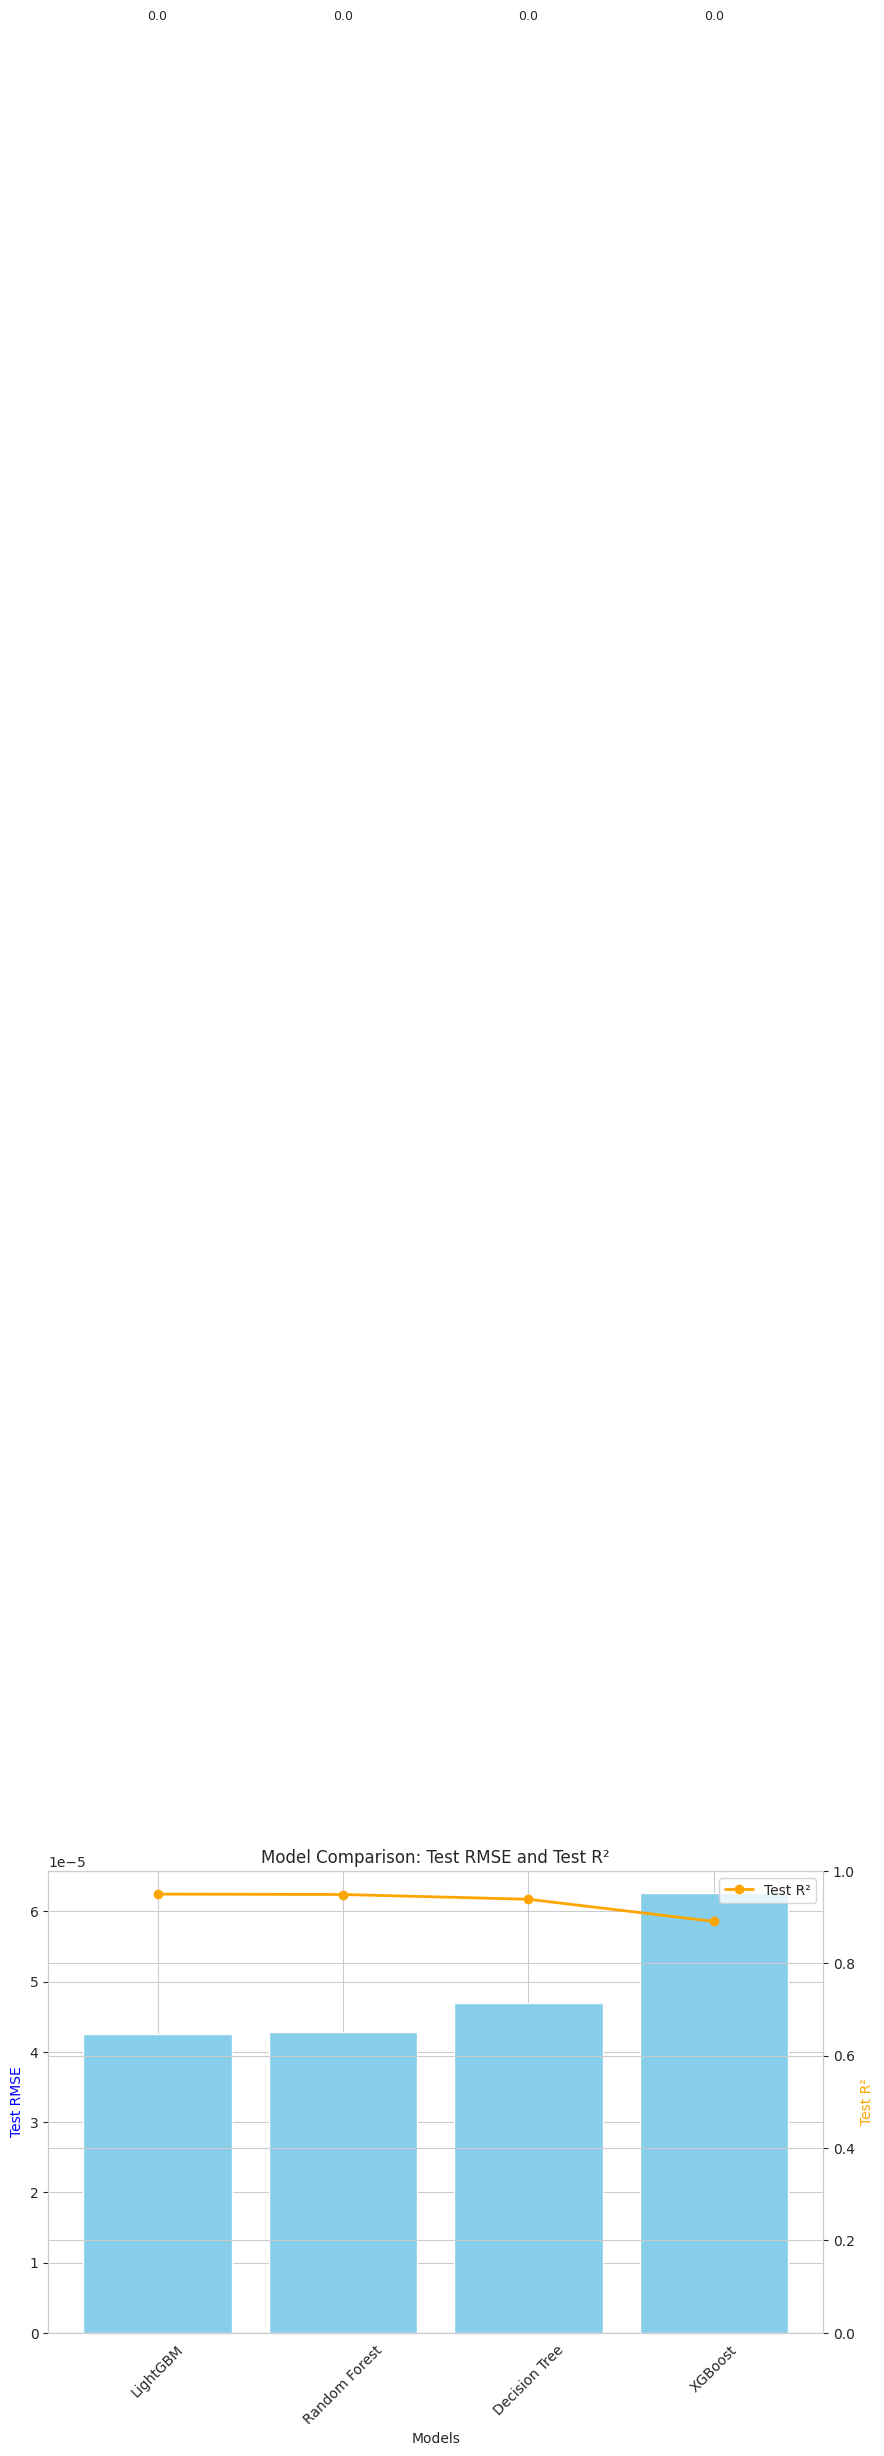

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

# X-axis: model names
models = comparison_table['Model']
rmse = comparison_table['Test RMSE']
r2 = comparison_table['Test R²']

# Bar chart for RMSE
bar = plt.bar(models, rmse, color='skyblue', label='Test RMSE')

# Create second y-axis for R²
plt.ylabel('Test RMSE', color='blue')
plt.xlabel('Models')
plt.xticks(rotation=45)

# Line chart for R²
ax2 = plt.gca().twinx()
ax2.plot(models, r2, color='orange', marker='o', linewidth=2, label='Test R²')
ax2.set_ylabel('Test R²', color='orange')
ax2.set_ylim(0,1)  # R² ranges from 0 to 1

# Add legends
plt.title("Model Comparison: Test RMSE and Test R²")
bar_labels = [f'{v:.1f}' for v in rmse]
for rect, label in zip(bar, bar_labels):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=9)

ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',   # maximize R²
    n_jobs=-1,
    verbose=2
)

# Fit GridSearch
grid_search.fit(X_train_p, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best estimator
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
476 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py"

Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


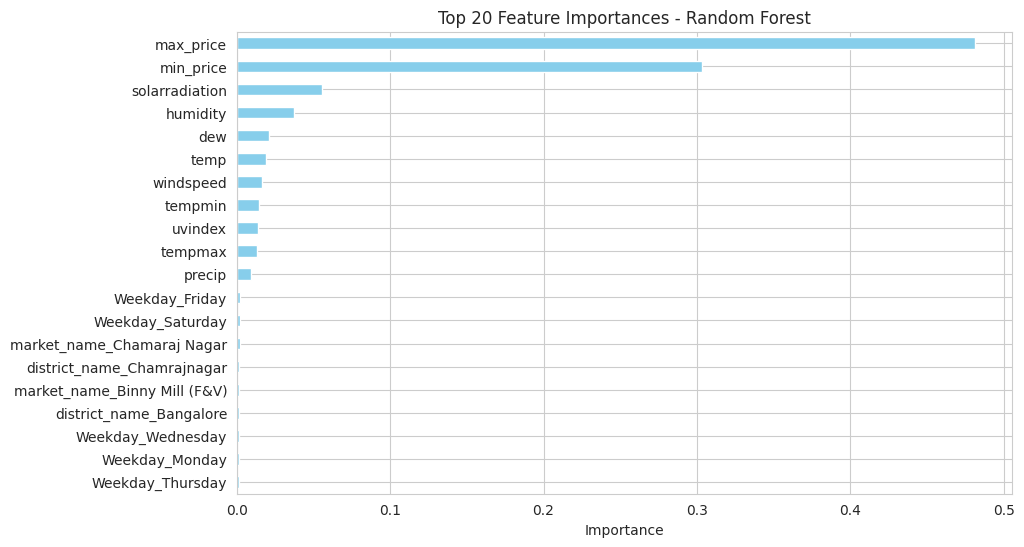

In [43]:
# Numerical features
num_features = list(num_cols)

# Encoded categorical features from OneHotEncoder
encoded_cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)

# Combine all features
all_features = np.concatenate([num_features, encoded_cat_features])

# Feature importances
importances = best_rf.feature_importances_
feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)[:20]  # top 20

# Plot
plt.figure(figsize=(10,6))
feat_imp.plot(kind='barh', color='skyblue')
plt.title("Top 20 Feature Importances - Random Forest")
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.show()


In [44]:
from sklearn.pipeline import Pipeline

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),        # scaling + encoding
    ('regressor', best_rf)                 # tuned Random Forest
])

# Fit on training data
rf_pipeline.fit(X_train, y_train)

# Predict
y_pred_pipeline = rf_pipeline.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred_pipeline))
mae = mean_absolute_error(y_test, y_pred_pipeline)
r2 = r2_score(y_test, y_pred_pipeline)

print(f"Pipeline Performance:\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.2f}")


Pipeline Performance:
RMSE: 0.00
MAE: 0.00
R²: 0.93


In [45]:
import joblib

# Save pipeline
joblib_file = "rf_pipeline.pkl"  # Changed the path to save in the current working directory
joblib.dump(rf_pipeline, joblib_file)

print(f"Pipeline saved as: {joblib_file}")

Pipeline saved as: rf_pipeline.pkl


In [46]:
# Using joblib
loaded_pipeline = joblib.load(joblib_file)
y_pred_loaded = loaded_pipeline.predict(X_test)

# Check performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred_loaded))
mae = mean_absolute_error(y_test, y_pred_loaded)
r2 = r2_score(y_test, y_pred_loaded)

print(f"Loaded Pipeline Performance:\nRMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.2f}")


Loaded Pipeline Performance:
RMSE: 0.00
MAE: 0.00
R²: 0.93
